**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [ ]:
# ENTER YOUR CODE HERE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [2]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 118MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [ ]:
# ENTER YOUR CODE HERE

In [4]:
data=pd.read_csv('/content/nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [ ]:
#ENTER YOUR CODE HERE

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [ ]:
#ENTER YOUR CODE HERE

In [7]:
data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [ ]:
#ENTER YOUR CODE HERE

In [8]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [ ]:
#ENTER YOUR CODE HERE

In [11]:
data=data.dropna()

**What is the shape of the dataframe now?**

In [ ]:
#ENTER YOUR CODE HERE

In [14]:
print("Shape of the dataframe post dropping rows with NaN values is :",data.shape)

Shape of the dataframe post dropping rows with NaN values is : (1329, 21)


Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [ ]:
#ENTER YOUR CODE HERE

In [24]:
features_dataframe=data.drop(['TARGET_5Yrs','Name'],axis=1)
label_dataframe=data['TARGET_5Yrs']
print(features_dataframe.shape)
print(label_dataframe.shape)

(1329, 19)
(1329,)


The shape of the features datafarme is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [ ]:
#ENTER YOUR CODE HERE

In [25]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [26]:
fea_train,fea_test,lab_train,lab_test=train_test_split(features_dataframe,label_dataframe,test_size=0.2,random_state=42)
print(fea_train.shape)
print(fea_test.shape)
print(lab_train.shape)
print(lab_test.shape)

(1063, 19)
(266, 19)
(1063,)
(266,)


The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [ ]:
#ENTER YOUR CODE HERE

In [27]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [ ]:
#ENTER YOUR CODE HERE

In [38]:
clf=LogisticRegression(max_iter=150)
clf.fit(fea_train,lab_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [ ]:
#ENTER YOUR CODE HERE

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Now test on the testing dataframe and print all of these metrics.**

In [ ]:
#ENTER YOUR CODE HERE

In [40]:
accuracy = accuracy_score(lab_test, clf.predict(fea_test))
precision = precision_score(lab_test, clf.predict(fea_test))
recall = recall_score(lab_test, clf.predict(fea_test))
f1 = f1_score(lab_test, clf.predict(fea_test))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7518796992481203
Precision: 0.8125
Recall: 0.8125
F1 score: 0.8125


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [ ]:
#ENTER YOUR CODE HERE

In [41]:
from sklearn import svm

**Just as we had before, load and fit a model on our training dataset.**

In [ ]:
#ENTER YOUR CODE HERE

In [42]:
clf=svm.SVC()
clf.fit(fea_train,lab_train)

SVC()

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [ ]:
#ENTER YOUR CODE HERE

In [44]:
accuracy = accuracy_score(lab_test, clf.predict(fea_test))
precision = precision_score(lab_test, clf.predict(fea_test))
recall = recall_score(lab_test, clf.predict(fea_test))
f1 = f1_score(lab_test, clf.predict(fea_test))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7443609022556391
Precision: 0.7872340425531915
Recall: 0.8409090909090909
F1 score: 0.8131868131868132


Accuracy: 0.7443609022556391
Precision: 0.7872340425531915
Recall: 0.8409090909090909
F1 score: 0.8131868131868132


### MULTICLASS CLASSIFICATION

In [45]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 75.2MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [ ]:
#ENTER YOUR CODE HERE

In [113]:
df=pd.read_csv("/content/social_well_being.csv")

**Always analyse the data.**

In [ ]:
#ENTER YOUR CODE HERE

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [66]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [67]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [ ]:
#ENTER YOUR CODE HERE

In [68]:
df["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [ ]:
#ENTER YOUR CODE HERE

In [69]:
print("The genders are : ",df['Gender'].unique())
print("The platforms are : ",df['Platform'].unique())

The genders are :  ['Female' 'Male' 'Non-binary']
The platforms are :  ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [ ]:
#ENTER YOUR CODE HERE

In [70]:
import pandas as pd

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [ ]:
#ENTER YOUR CODE HERE

In [114]:
Gender_encoded= pd.get_dummies(df['Gender'])
Gender_encoded=Gender_encoded.astype(int)
df=df.drop('Gender',axis=1)
df=pd.concat([df,Gender_encoded],axis=1)

In [115]:
df.head()

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0


,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [ ]:
#ENTER YOUR CODE HERE

In [116]:
Platform_encoded= pd.get_dummies(df['Platform'])
Platform_encoded=Platform_encoded.astype(int)
df=df.drop('Platform',axis=1)
df=pd.concat([df,Platform_encoded],axis=1)

In [117]:
df.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [78]:
#ENTER YOUR CODE HERE

**Now label encode the column 'Dominant_Emotion'**

In [79]:
#ENTER YOUR CODE HERE

In [118]:
Dominant_Emotion_encoded= pd.get_dummies(df['Dominant_Emotion'])
Dominant_Emotion_encoded=Dominant_Emotion_encoded.astype(int)


In [119]:
df.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0


In [120]:
df=df.drop("User_ID",axis=1)

In [121]:
df.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0


In [122]:
df.shape

(924, 17)

Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [ ]:
#ENTER YOUR CODE HERE

In [135]:
features_df=df.drop('Dominant_Emotion',axis=1)
label_df=df["Dominant_Emotion"]

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
f_train,f_test,l_train,l_test=train_test_split(features_df,label_df,test_size=0.2,random_state=42)
print(f_train.shape)
print(f_test.shape)
print(l_train.shape)
print(l_test.shape)

(739, 16)
(185, 16)
(739,)
(185,)


The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [ ]:
#ENTER YOUR CODE HERE

In [138]:
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [139]:
neigh=KNeighborsClassifier()
neigh.fit(f_train,l_train)

KNeighborsClassifier()

In [ ]:
#ENTER YOUR CODE HERE

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [ ]:
#ENTER YOUR CODE HERE

In [140]:
print(neigh.predict(f_test))

['Anger' 'Anger' 'Boredom' 'Happiness' 'Neutral' 'Anxiety' 'Neutral'
 'Anxiety' 'Neutral' 'Boredom' 'Neutral' 'Neutral' 'Boredom' 'Happiness'
 'Anxiety' 'Anxiety' 'Anxiety' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Boredom' 'Neutral' 'Happiness' 'Boredom' 'Neutral' 'Anger' 'Anxiety'
 'Anger' 'Neutral' 'Anxiety' 'Sadness' 'Anxiety' 'Happiness' 'Anger'
 'Anxiety' 'Anger' 'Happiness' 'Sadness' 'Anxiety' 'Anger' 'Anger'
 'Sadness' 'Neutral' 'Happiness' 'Neutral' 'Neutral' 'Anger' 'Happiness'
 'Boredom' 'Sadness' 'Anxiety' 'Anxiety' 'Sadness' 'Happiness' 'Anger'
 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness' 'Anger'
 'Anxiety' 'Happiness' 'Happiness' 'Happiness' 'Anxiety' 'Neutral'
 'Happiness' 'Neutral' 'Boredom' 'Boredom' 'Anxiety' 'Neutral' 'Happiness'
 'Neutral' 'Happiness' 'Anger' 'Sadness' 'Sadness' 'Neutral' 'Sadness'
 'Anger' 'Happiness' 'Happiness' 'Anger' 'Anger' 'Sadness' 'Happiness'
 'Anxiety' 'Neutral' 'Anger' 'Sadness' 'Neutral' 'Happiness' 'Happiness'
 'Sa

,Dominant_Emotion_Encoded_Predicted
0,5
1,5
2,1
3,1
4,4
...,...
180,4
181,1
182,5
183,3


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [ ]:
#ENTER YOUR CODE HERE

['Sadness' 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Sadness' 'Anxiety'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Sadness' 'Anxiety' 'Happiness'
 'Sadness' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Sadness' 'Happiness'
 'Neutral' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Happiness' 'Anxiety'
 'Happiness' 'Anxiety' 'Neutral' 'Happiness' 'Happiness' 'Anxiety'
 'Sadness' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Neutral' 'Anxiety'
 'Neutral' 'Happiness' 'Happiness' 'Happiness' 'Neutral' 'Sadness'
 'Sadness' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger' 'Happiness'
 'Sadness' 'Sadness' 'Happiness' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Anger' 'Neutral' 'Neutral' 'Neutral' 'Happiness' 'Anxiety'
 'Anxiety' 'Happiness' 'Happiness' 'Anger' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Anger' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Ange

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [ ]:
#ENTER YOUR CODE HERE

In [143]:
accuracy_multi = accuracy_score(l_test, neigh.predict(f_test))
print(accuracy_multi)

0.9891891891891892


Accuracy of the model is: 0.9837837837837838


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [ ]:
#ENTER YOUR CODE HERE

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# iris=load_iris()
# features_dataframe,label_dataframe=iris.data,iris.target


cm=confusion_matrix(l_test,neigh.predict(f_test))
print(cm)

print(classification_report(l_test, neigh.predict(f_test)))

[[29  0  0  0  0  0]
 [ 0 34  1  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  1  0 42  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       0.97      0.97      0.97        35
     Boredom       0.95      1.00      0.97        18
   Happiness       1.00      0.98      0.99        43
     Neutral       1.00      1.00      1.00        35
     Sadness       1.00      1.00      1.00        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



The cofusion matrix is:
[[22  0  0  0  0  0]
 [ 0 32  0  0  0  1]
 [ 0  0 15  0  0  1]
 [ 0  0  0 47  0  0]
 [ 0  1  0  0 35  0]
 [ 0  0  0  0  0 31]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       0.97      0.97      0.97        33
     Boredom       1.00      0.94      0.97        16
   Happiness       1.00      1.00      1.00        47
     Neutral       1.00      0.97      0.99        36
     Sadness       0.94      1.00      0.97        31

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [ ]:
#ENTER YOUR CODE HERE

In [146]:
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [ ]:
#ENTER YOUR CODE HERE

In [147]:
Nb=GaussianNB()
Nb.fit(f_train,l_train)

GaussianNB()

0.42702702702702705


[[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  5  0  1]
 [12  0  7  1  0  5]]
              precision    recall  f1-score   support

       Anger       0.36      0.79      0.49        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.26      0.78      0.39        18
   Happiness       0.63      0.86      0.73        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.62      0.20      0.30        25

    accuracy                           0.43       185
   macro avg       0.31      0.44      0.32       185
weighted avg       0.31      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [ ]:
#ENTER YOUR CODE HERE

In [150]:
acc_nb=accuracy_score(l_test,Nb.predict(f_test))
print(acc_nb)

0.42702702702702705


**Finally, print the accuracy, confusion matrix and classification report.**

In [ ]:
#ENTER YOUR CODE HERE

In [151]:
cm=confusion_matrix(l_test,Nb.predict(f_test))
print(cm)

print(classification_report(l_test, Nb.predict(f_test)))

[[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  5  0  1]
 [12  0  7  1  0  5]]
              precision    recall  f1-score   support

       Anger       0.36      0.79      0.49        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.26      0.78      0.39        18
   Happiness       0.63      0.86      0.73        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.62      0.20      0.30        25

    accuracy                           0.43       185
   macro avg       0.31      0.44      0.32       185
weighted avg       0.31      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is: 0.4540540540540541
The cofusion matrix is:
[[18  0  3  1  0  0]
 [ 6  0 14  9  0  4]
 [ 1  0 15  0  0  0]
 [ 1  0  0 44  0  2]
 [ 4  0 22  6  0  4]
 [14  0  9  1  0  7]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.41      0.82      0.55        22
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.24      0.94      0.38        16
   Happiness       0.72      0.94      0.81        47
     Neutral       0.00      0.00      0.00        36
     Sadness       0.41      0.23      0.29        31

    accuracy                           0.45       185
   macro avg       0.30      0.49      0.34       185
weighted avg       0.32      0.45      0.35       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree


In [152]:
from sklearn import tree

tr=tree.DecisionTreeClassifier()
tr.fit(f_train,l_train)

DecisionTreeClassifier()

In [153]:
acc_tr=accuracy_score(l_test,tr.predict(f_test))
print(acc_tr)

0.9567567567567568


In [154]:
cm=confusion_matrix(l_test,tr.predict(f_test))
print(cm)

print(classification_report(l_test, tr.predict(f_test)))

[[29  0  0  0  0  0]
 [ 0 34  0  0  1  0]
 [ 0  1 16  0  0  1]
 [ 0  1  0 42  0  0]
 [ 0  1  0  0 34  0]
 [ 1  1  0  0  1 22]]
              precision    recall  f1-score   support

       Anger       0.97      1.00      0.98        29
     Anxiety       0.89      0.97      0.93        35
     Boredom       1.00      0.89      0.94        18
   Happiness       1.00      0.98      0.99        43
     Neutral       0.94      0.97      0.96        35
     Sadness       0.96      0.88      0.92        25

    accuracy                           0.96       185
   macro avg       0.96      0.95      0.95       185
weighted avg       0.96      0.96      0.96       185



#RANDOM FOREST

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc=RandomForestClassifier()
rfc.fit(f_train,l_train)

RandomForestClassifier()

In [157]:
acc_rfc=accuracy_score(l_test,rfc.predict(f_test))
print(acc_rfc)

0.9891891891891892


In [158]:
cm=confusion_matrix(l_test,rfc.predict(f_test))
print(cm)

print(classification_report(l_test, rfc.predict(f_test)))

[[29  0  0  0  0  0]
 [ 0 34  1  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  0 43  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  1 24]]
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       1.00      0.97      0.99        35
     Boredom       0.95      1.00      0.97        18
   Happiness       1.00      1.00      1.00        43
     Neutral       0.97      1.00      0.99        35
     Sadness       1.00      0.96      0.98        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [3]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

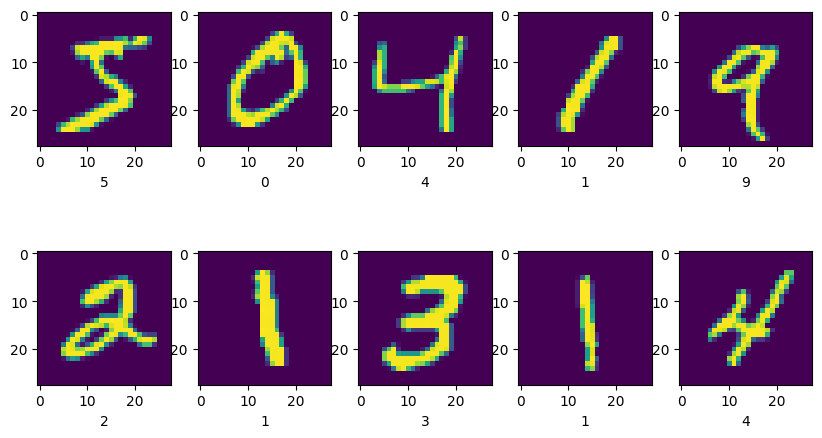

In [4]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

3


In [14]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    pass

  def softmax(self, Z):
    # Implement the softmax activation function
    pass

  def forward_propagation(self, X):
    # Implement the forward_propagation function
    pass
  def one_hot_encode(self, y):
    # Implement one hot encoding
    pass

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    pass

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    #implement train
    pass

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [17]:
class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.randn(self.num_of_nodes_layers, self.input_size) * 0.01
        self.weights_biases['b1'] = np.zeros((self.num_of_nodes_layers, 1))

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.randn(self.num_of_nodes_layers, self.num_of_nodes_layers) * 0.01
            self.weights_biases[f'b{i}'] = np.zeros((self.num_of_nodes_layers, 1))

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.randn(self.output_size, self.num_of_nodes_layers) * 0.01
        self.weights_biases[f'b{self.num_layers + 1}'] = np.zeros((self.output_size, 1))

    def RELU(self, Z):
        return np.maximum(0, Z)

    def dRELU(self, Z):
        return Z > 0

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return expZ / np.sum(expZ, axis=0, keepdims=True)

    def forward_propagation(self, X):
        A = X
        self.activations['A0'] = X
        for i in range(1, self.num_layers + 1):
            Z = np.dot(self.weights_biases[f'W{i}'], A) + self.weights_biases[f'b{i}']
            A = self.RELU(Z)
            self.activations[f'Z{i}'] = Z
            self.activations[f'A{i}'] = A

        Z_final = np.dot(self.weights_biases[f'W{self.num_layers + 1}'], A) + self.weights_biases[f'b{self.num_layers + 1}']
        A_final = self.softmax(Z_final)
        self.activations[f'Z{self.num_layers + 1}'] = Z_final
        self.activations[f'A{self.num_layers + 1}'] = A_final

        return A_final, self.activations

    def one_hot_encode(self, y):
        one_hot = np.zeros((self.output_size, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(y_pred + 1e-8)) / m
        return loss

    def backward_prop(self, y_pred, Y):
        gradients = {}
        m = Y.shape[1]
        dZ = y_pred - Y

        for i in reversed(range(1, self.num_layers + 2)):
            A_prev = self.activations[f'A{i-1}']
            gradients[f'dW{i}'] = (1/m) * np.dot(dZ, A_prev.T)
            gradients[f'db{i}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

            if i > 1:
                dA_prev = np.dot(self.weights_biases[f'W{i}'].T, dZ)
                dZ = dA_prev * self.dRELU(self.activations[f'Z{i-1}'])

        return gradients


    def update_params(self,gradients):

      for i in range(1, self.num_layers + 2):
        self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
        self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

    def train(self, X, y, num_iterations):
        self.initial_params()
        Y = self.one_hot_encode(y)

        for i in range(num_iterations):
            y_pred, _ = self.forward_propagation(X)
            loss = self.total_loss(y_pred, Y)
            gradients = self.backward_prop(y_pred, Y)
            self.update_params(gradients)

            if i % 100 == 0 or i == num_iterations - 1:
                print(f"Iteration {i} - Loss: {loss:.4f}")

    def predict(self, X):
        A, _ = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)
        return predictions


In [18]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration 0 - Loss: 2.3026
Iteration 100 - Loss: 2.3012
Iteration 200 - Loss: 2.3011
Iteration 300 - Loss: 2.3011
Iteration 400 - Loss: 2.3011
Iteration 500 - Loss: 2.3011
Iteration 600 - Loss: 2.3011
Iteration 700 - Loss: 2.3011
Iteration 800 - Loss: 2.3011
Iteration 900 - Loss: 2.3011
Iteration 1000 - Loss: 2.3011
Iteration 1100 - Loss: 2.3010
Iteration 1200 - Loss: 2.3008
Iteration 1300 - Loss: 2.3003
Iteration 1400 - Loss: 2.2939
Iteration 1500 - Loss: 1.8387
Iteration 1600 - Loss: 1.6770
Iteration 1700 - Loss: 1.3457
Iteration 1800 - Loss: 1.0786
Iteration 1900 - Loss: 0.8079
Iteration 2000 - Loss: 0.5700
Iteration 2100 - Loss: 0.4100
Iteration 2200 - Loss: 0.3320
Iteration 2300 - Loss: 0.2527
Iteration 2400 - Loss: 0.2180
Iteration 2500 - Loss: 0.2115
Iteration 2600 - Loss: 0.1463
Iteration 2700 - Loss: 0.1255
Iteration 2800 - Loss: 0.1082
Iteration 2900 - Loss: 0.6085
Iteration 3000 - Loss: 0.1537
Iteration 3100 - Loss: 0.2239
Iteration 3200 - Loss: 0.1476
Iteration 3300 - Loss:

In [19]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 94.89 %


3


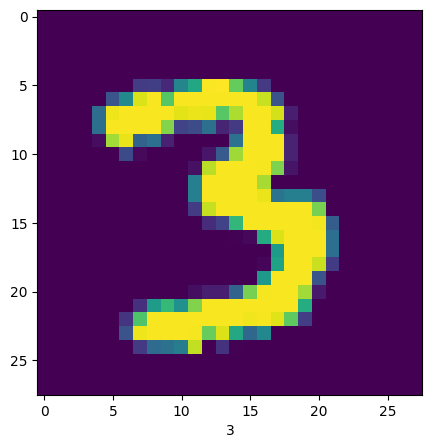

In [20]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
